# Exercise VIII: K-Means Clustering and PCA

## Iris Dataset

Let's start things off with a simple application of our subject material on the Iris dataset to better understand our workflow and the relevant metrics.

### Set up

In [1]:
import pandas as pd

from sklearn.datasets import load_iris


data = load_iris(as_frame=True)

X_iris, y_iris = data.data, data.target
y_iris = y_iris.replace(
    {index: name
     for index, name in enumerate(data["target_names"])})

### Dimensionality Reduction using [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [2]:
from sklearn.decomposition import PCA

IRIS_N_COMPONENTS = X_iris.shape[1] - 1

iris_pca = PCA(n_components=IRIS_N_COMPONENTS)
_ = iris_pca.fit(X_iris)

Let's try and evaluate how well did PCA manage to find small number of components to explain the variance:

````{admonition} plots/utils.py
    :class: dropdown, tip
```{literalinclude} plots/utils.py
```
````

````{admonition} plots/explained_variance.py
    :class: dropdown, tip
```{literalinclude} plots/explained_variance.py
```
````

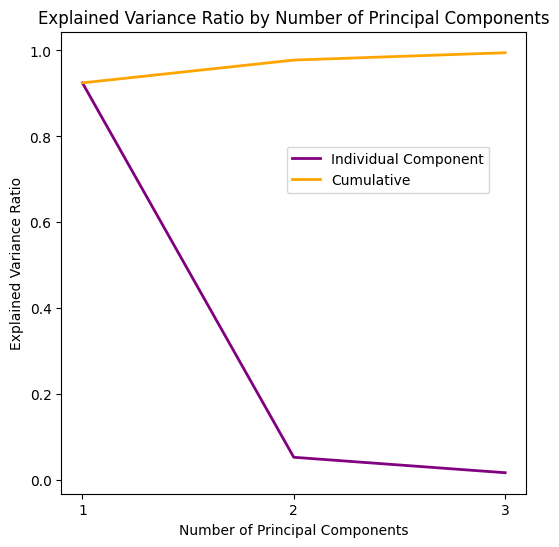

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from plots.explained_variance import create_explained_variance_df, plot_explained_variance_ratio


# Create explained variance ratio figure
fig_kwargs = {"figsize": (6, 6)}
iris_explained_variance_fig, iris_explained_variance_ax = plot_explained_variance_ratio(
    iris_pca, fig_kwargs=fig_kwargs)

# Create explained variance ratio dataframe
explained_variance_df = create_explained_variance_df(iris_pca)

In [4]:
from myst_nb import glue
from plots.utils import organize_kwargs


explained_variance_df_repr = explained_variance_df.style.set_table_styles([
    dict(selector="th", props=[("font-size", "12px")]),
    dict(selector="td", props=[("font-size", "12px")]),
])

glue("iris_explained_variance_fig", iris_explained_variance_fig, display=False)
glue("iris_explained_variance_df", explained_variance_df_repr, display=False)

````{panels}
```{glue:figure} iris_explained_variance_df
    :figwidth: 300px
    :name: "iris-explained_variance-df"
```
---
```{glue:figure} iris_explained_variance_fig
    :figwidth: 300px
    :name: "iris-explained_variance-fig"
```
````

In [5]:
iris_explained_variance_2 = explained_variance_df.loc[2, "Cumulative"] * 100
iris_explained_variance_3 = explained_variance_df.loc[3, "Cumulative"] * 100

glue("iris_explained_variance_2", iris_explained_variance_2, display=False)
glue("iris_explained_variance_3", iris_explained_variance_3, display=False)

We've managed to capture {glue:text}`iris_explained_variance_2:.2f`% of the variance using only 2 components, and {glue:text}`iris_explained_variance_3:.2f`% percent using 3, not bad at all!

To calculate the coordinates of the dataset in the dimensions of the calculated principal components, we have to call [`tranform()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform):

In [6]:
X_iris_reduced = iris_pca.transform(X_iris)
X_iris_reduced.shape

(150, 3)

```{note}
As with many other classes that implement this general procedure, `sklearn` also provides a [`fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform) function to do both more conveniently.
```

Fortunately, 2 and 3 dimensions are also simple enough to visualize:

````{admonition} plots/pca_scatter.py
    :class: dropdown, tip
```{literalinclude} plots/pca_scatter.py
```
````

In [7]:
from plots.pca_scatter import plot_reduced


y_iris_labels = y_iris.replace({"setosa": 0, "versicolor": 1, "virginica": 2}).values

plot_reduced(X_iris_reduced, y_iris_labels)

/tmp/ipykernel_3416724/1532924392.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_iris_labels = y_iris.replace({"setosa": 0, "versicolor": 1, "virginica": 2}).values


interactive(children=(IntSlider(value=10, description='elev', max=30, min=-10), IntSlider(value=-90, descripti…

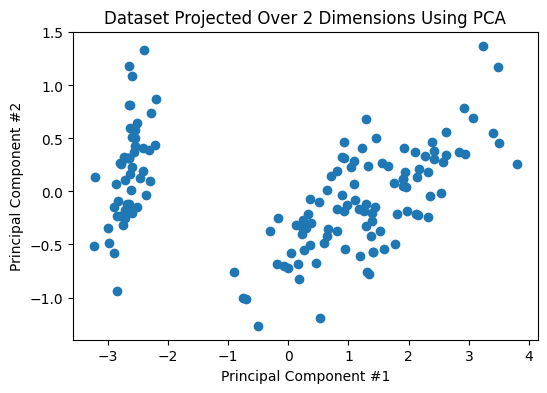

In [8]:
plot_reduced(X_iris_reduced[:, :2], true_labels=y_iris_labels)

Ah, we can already guess the `setosa` class to be that discernible cloud on the left of both dimensionality-reduced scatters.

### [K-means](https://en.wikipedia.org/wiki/K-means_clustering) Clustering

Next, we could try and identify the underlying classes or Iris genera and comparing our results against the actual labels. Essentially, we are checking how does the reduction of the feature space using PCA impact our ability to detect the different iris genera using K-means clustering.

In [9]:
from sklearn.cluster import KMeans


N_IRIS_CLASSES = 3

iris_kmeans = KMeans(n_clusters=N_IRIS_CLASSES, random_state=0)

```{warning}
Note that this is an educational example meant to improve our understanding of dimensionality reduction and clustering, not to represent a relevant use case for clustering. In most cases, clustering is an appealing choice when we don't actually know the labels (which is why it is considered an *unsupervised* learning method).
```

In [10]:
iris_labels_4 = iris_kmeans.fit_predict(X_iris)
iris_labels_3 = iris_kmeans.fit_predict(X_iris_reduced[:, :3])
iris_labels_2 = iris_kmeans.fit_predict(X_iris_reduced[:, :2])
iris_labels_1 = iris_kmeans.fit_predict(X_iris_reduced[:, :1].reshape(-1, 1))

/home/groot/Projects/courses/ml_for_neuro/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/groot/Projects/courses/ml_for_neuro/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/groot/Projects/courses/ml_for_neuro/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/groot/Projects/courses/ml_for_neuro/venv/lib/python3.10/site-packages/

Again, we'll plot the observations in their reduced spaces, only this time we will include the <span style="color:red">cluster index</span> (represented with the <span style="color:red">color</span> of each observation), as well as the classification's success relative to the **true labels** (represented with **circles for correct versus "X" for incorrect** classifications).

In [11]:
plot_reduced(X_iris_reduced, iris_labels_3, y_iris_labels)

interactive(children=(IntSlider(value=10, description='elev', max=30, min=-10), IntSlider(value=-90, descripti…

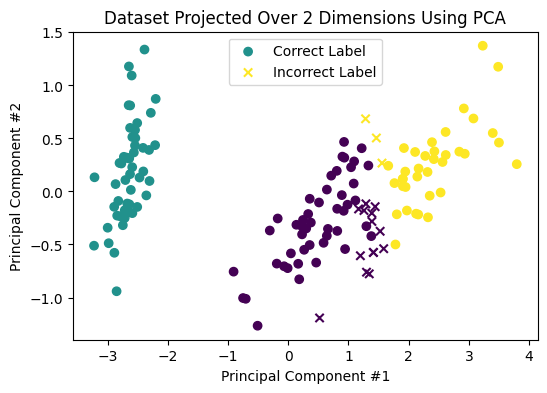

In [12]:
plot_reduced(X_iris_reduced[:, :2], iris_labels_2, y_iris_labels)
plt.show()

#### Clustering Evaluation

How do you think we did relative to the baseline (clustering using all 4 features) as we reduced the dimensionality of the dataset?

````{admonition} plots/accuracy.py
    :class: dropdown, tip
```{literalinclude} plots/accuracy.py
```
````

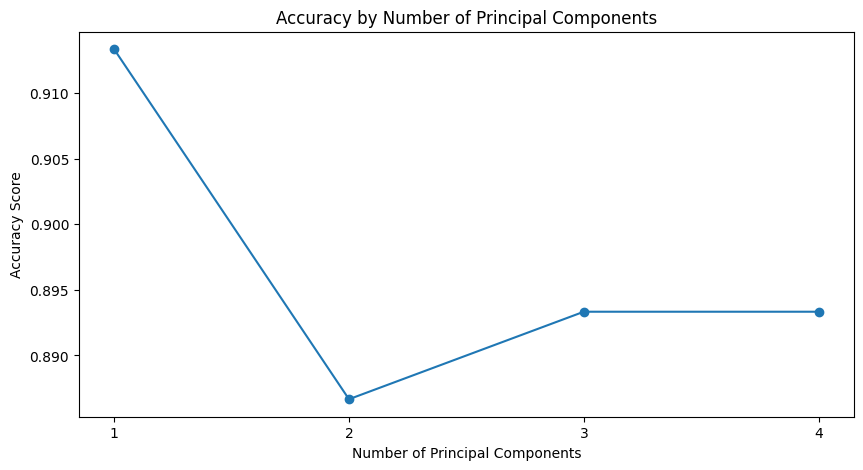

In [13]:
from plots.accuracy import plot_accuracy_by_pc


classification_labels = (iris_labels_1, iris_labels_2, iris_labels_3,
                         iris_labels_4)
_ = plot_accuracy_by_pc(classification_labels, y_iris_labels)

Surprisingly, reducing the dimensionality of the iris dataset to  1 has improved the performance of K-means classification significantly when compared to the true labels. 

`sklearn`'s `metrics` module also provides us with the [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) metric for evaluating the degree of separation between the clusters:

````{admonition} plots/silhouette.py
    :class: dropdown, tip
```{literalinclude} plots/silhouette.py
```
````

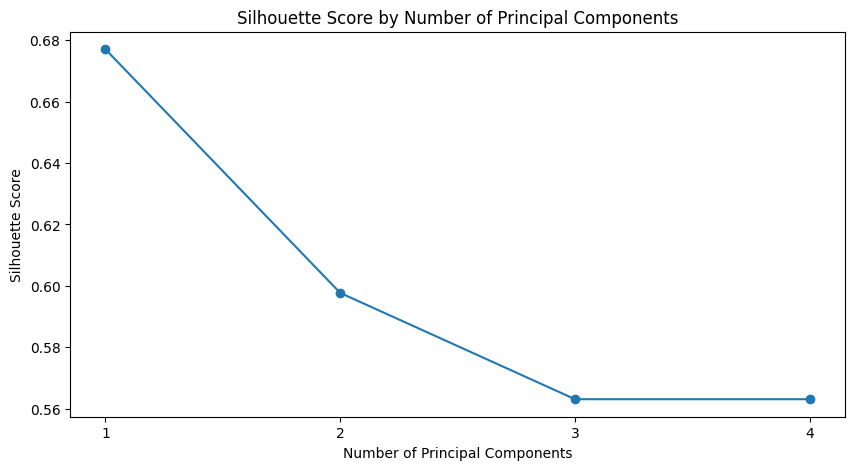

In [14]:
from plots.silhouette import plot_silhouette_scores_by_pc


_ = plot_silhouette_scores_by_pc(X_iris_reduced, classification_labels)

It seems that using only a single principal component yielded not only the best results when compared to the true labels, but also the greatest degree of separation between the clusters (as estimated using `silhouette_score`).

## ASD Subtypes Classification

So, now we know how to implement both PCA and K-means clustering using `sklearn`. Next, we will try and explore the possibility of identifying ASD subtypes using  and  on the [ABIDE II](http://fcon_1000.projects.nitrc.org/indi/abide/abide_II.html) dataset, again, based on [Prof. Tal Yarkoni](https://talyarkoni.org/)'s workshop in  the [NeuroHackademy](https://neurohackademy.org/) 2020 (available [here](https://github.com/neurohackademy/nh2020-curriculum/tree/master/tu-machine-learning-yarkoni)). This procedure is somewhat similar to what we did with the iris dataset (in terms of combining PCA and K-means to identify clusters in a dimensionality-reduced space), however, this time the labels are not known to us, and we will try to evaluate whether the results of our analysis produce convincing results.

First, as always, we have to load the data and clean it up a little bit:

In [15]:
TSV_URL = "https://raw.githubusercontent.com/neurohackademy/nh2020-curriculum/master/tu-machine-learning-yarkoni/data/abide2.tsv"
data = pd.read_csv(TSV_URL, delimiter="\t")

# Clean up
IGNORED_COLUMNS = ["age_resid", "sex"]
REPLACE_DICT = {"group": {1: "ASD", 2: "Control"}}
data.drop(columns=IGNORED_COLUMNS, inplace=True)
data.replace(REPLACE_DICT, inplace=True)

This time, however, we're only interested in ASD positive observations:

In [16]:
asd_positive = data["group"] == "ASD"

# Feature matrix
X = data[asd_positive].filter(regex="^fs").copy()
X

,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,fsArea_L_3b_ROI,fsArea_L_FEF_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,2750.0,306.0,354.0,2123.0,1451.0,1128.0,269.0,1751.0,1338.0,632.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,2836.0,186.0,354.0,2261.0,1584.0,1241.0,259.0,1521.0,1105.0,302.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
3,3382.0,266.0,422.0,2686.0,1893.0,1359.0,234.0,1889.0,1545.0,407.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
5,3020.0,390.0,408.0,2455.0,1597.0,1219.0,280.0,2154.0,1733.0,528.0,...,3.017,3.202,3.242,2.698,3.035,2.996,3.261,3.310,3.165,2.637
6,3522.0,140.0,471.0,2935.0,2007.0,1483.0,195.0,1709.0,1353.0,447.0,...,2.338,3.297,2.941,2.685,3.280,2.912,2.523,3.338,2.926,3.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,3231.0,202.0,398.0,2699.0,1584.0,1018.0,137.0,1992.0,1378.0,557.0,...,3.329,3.192,2.415,2.698,3.230,2.815,2.756,2.872,3.107,3.069
995,2679.0,218.0,309.0,2041.0,1473.0,1100.0,232.0,1731.0,1183.0,436.0,...,2.561,3.458,2.758,2.756,2.945,2.560,2.651,2.703,2.248,3.410
996,1739.0,229.0,454.0,1600.0,1006.0,755.0,163.0,1618.0,1279.0,361.0,...,2.905,3.615,2.658,2.498,3.499,3.429,3.123,2.511,3.530,3.340
998,3393.0,319.0,583.0,2996.0,2057.0,1451.0,259.0,1773.0,1455.0,662.0,...,2.684,3.193,2.824,2.728,3.558,2.787,3.765,2.893,2.632,3.485


### Principal Component Analysis (PCA)

We will use PCA to try and "capture" as much of the variance of our 1,440 features using a limited number of principal components.

In [17]:
from sklearn.decomposition import PCA

N_COMPONENTS = 20

pca = PCA(n_components=N_COMPONENTS)
X_reduced = pca.fit_transform(X)

Let's try and evaluate how well did PCA manage to find small number of components to explain the variance:

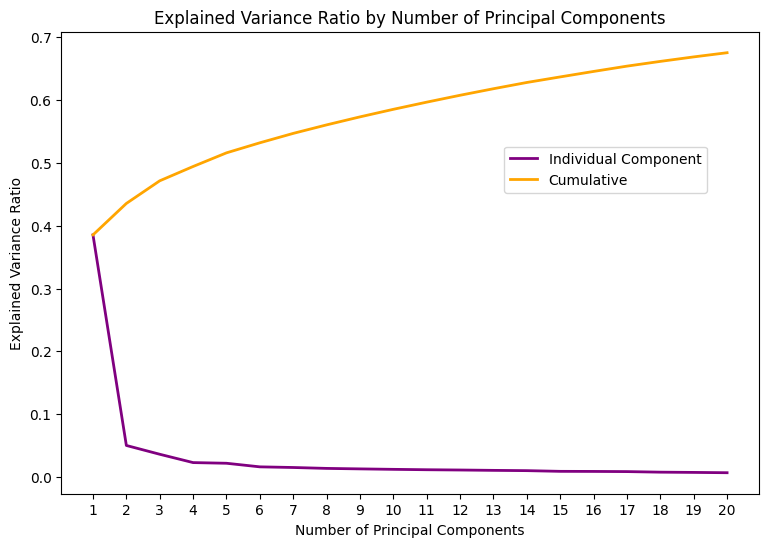

In [18]:
_ = plot_explained_variance_ratio(pca)

In [19]:
k_3_explained = f"{np.cumsum(pca.explained_variance_ratio_)[3] * 100:.2f}"

glue("k_3_explained", k_3_explained, display=False)

It seems like the added value of using more than 2 or 3 components is relatively negligible, with 3 components explaining a total of {glue:text}`k_3_explained:.2f`% of the total variance. 

### K-Means Clustering

#### Clustering Evaluation

/home/groot/Projects/courses/ml_for_neuro/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/groot/Projects/courses/ml_for_neuro/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/groot/Projects/courses/ml_for_neuro/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/groot/Projects/courses/ml_for_neuro/venv/lib/python3.10/site-packages/

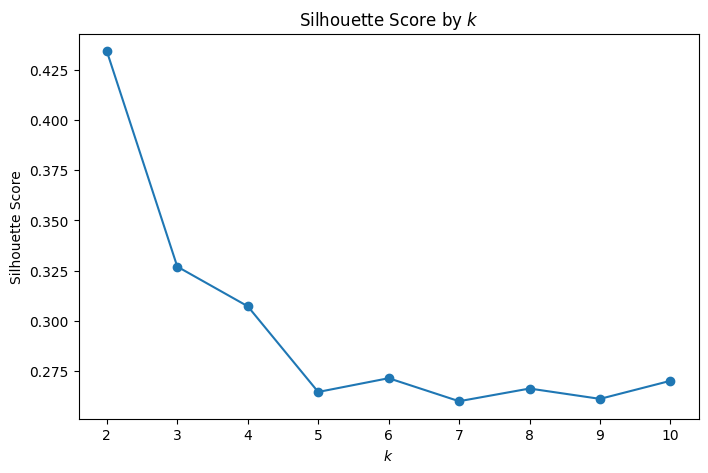

In [20]:
from plots.silhouette import plot_silhouette_scores_by_k


X_3 = X_reduced[:, :3]
_ = plot_silhouette_scores_by_k(X_3, max_k=10)

The best degree of separation was obtained for $k=2$. Let's visualize the two clusters and obtain some qualitative understanding of how well (or badly) our model did:

In [21]:
classification_labels = KMeans(n_clusters=2, random_state=0).fit(X_3).labels_
plot_reduced(X_3, classification_labels)

/home/groot/Projects/courses/ml_for_neuro/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


interactive(children=(IntSlider(value=10, description='elev', max=30, min=-10), IntSlider(value=-90, descripti…

Indeed, it seems our model's ability to cluster ASD subtypes using three principal components is rather poor.

<figure>
    <center><img src="https://i.pinimg.com/736x/69/50/00/695000a9292f168cb9d8844b348e48f5.jpg" alt="Back to the Drawing Board" width="600"/></center>
</figure>